In [39]:
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv(r'C:\Users\aryan\OneDrive\Desktop\Capstone Project\Data Preprocessing\gurgaon_properties_post_feature_selection.csv')

In [41]:
df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,36,3,2,2.0,1.0,850.0,0,0,0,1.0,1.0,0.82
1,0.0,89,2,2,2.0,1.0,1226.0,1,0,0,1.0,2.0,0.95
2,0.0,33,2,2,1.0,1.0,1000.0,0,0,0,1.0,0.0,0.32
3,0.0,92,3,4,4.0,3.0,1615.0,1,0,1,0.0,2.0,1.60
4,0.0,102,2,2,1.0,3.0,582.0,0,1,0,0.0,2.0,0.48


In [42]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [43]:
print(X.shape)
print(y.shape)

(3553, 12)
(3553,)


In [44]:
X = df.drop(columns= 'price')
y = df['price']

In [45]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

In [46]:
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

<Axes: xlabel='price', ylabel='Density'>

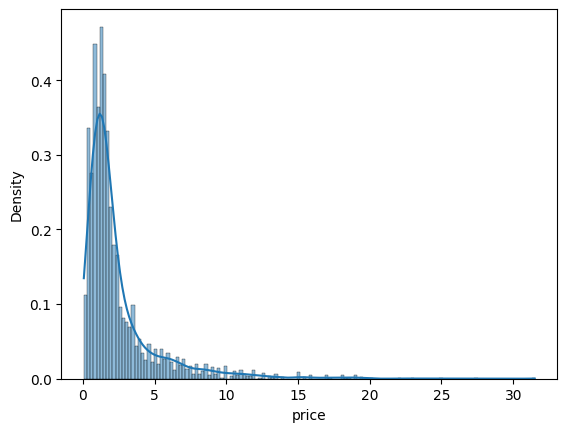

In [47]:
import seaborn as sns

sns.histplot(df['price'], kde= True, stat= 'density')

<Axes: ylabel='Density'>

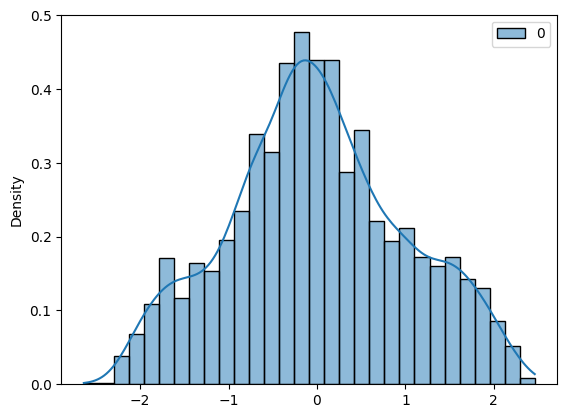

In [48]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
y_yeo_transformed = pt.fit_transform(df[['price']])

sns.histplot(y_yeo_transformed, kde= True, stat= 'density')

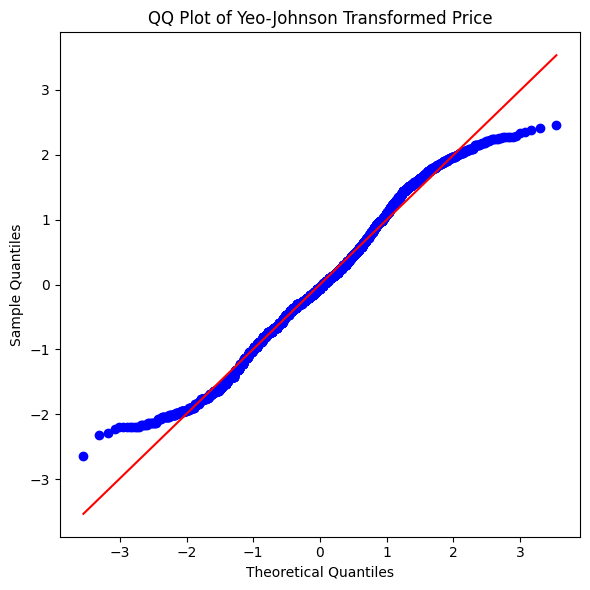

In [49]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
stats.probplot(y_yeo_transformed.flatten(), dist="norm", plot=plt)
plt.title('QQ Plot of Yeo-Johnson Transformed Price')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.tight_layout()
plt.show()

<Axes: xlabel='price', ylabel='Density'>

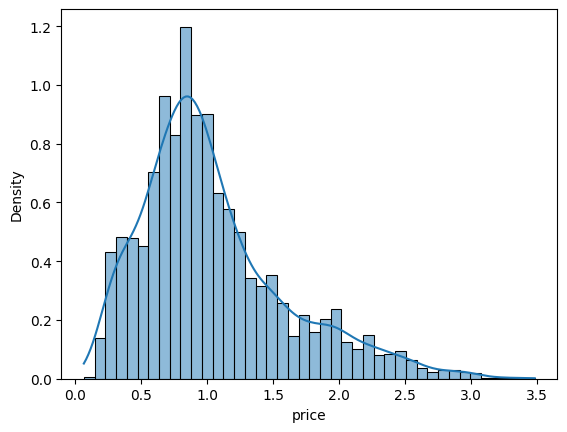

In [50]:
y_log_transformed = np.log1p(y)

sns.histplot(y_log_transformed, kde= True, stat= 'density')

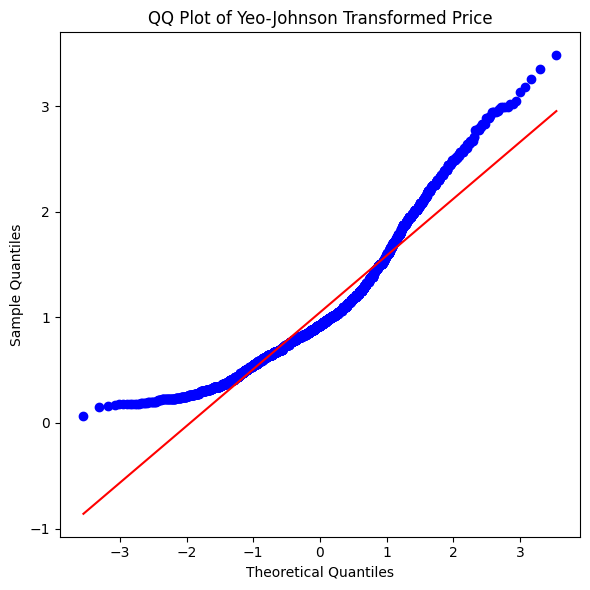

In [51]:
plt.figure(figsize=(6, 6))
stats.probplot(y_log_transformed, dist="norm", plot=plt)
plt.title('QQ Plot of Yeo-Johnson Transformed Price')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.tight_layout()
plt.show()

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(drop= 'first'), columns_to_encode)
    ],
    remainder= 'passthrough'
)

In [53]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel= 'rbf'))
])

In [54]:
kfold = KFold(n_splits= 10, shuffle= True, random_state= 42)
scores = cross_val_score(pipeline, X, y_log_transformed, cv= kfold, scoring= 'r2').mean()

In [55]:
scores

np.float64(0.8795772592693227)

In [56]:
from sklearn.metrics import mean_absolute_error

mae_scores = cross_val_score(
    pipeline, X, y_log_transformed, 
    cv=kfold, 
    scoring='neg_mean_absolute_error'
)
mean_mae = -mae_scores.mean()
print("Mean Absolute Error (CV):", mean_mae)


Mean Absolute Error (CV): 0.12954751221614716
